In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from numpy import unique
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import DBSCAN

In [12]:
data = pd.read_csv("Mall_Customers.csv", usecols=['Annual Income (k$)', 'Spending Score (1-100)'])
data.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


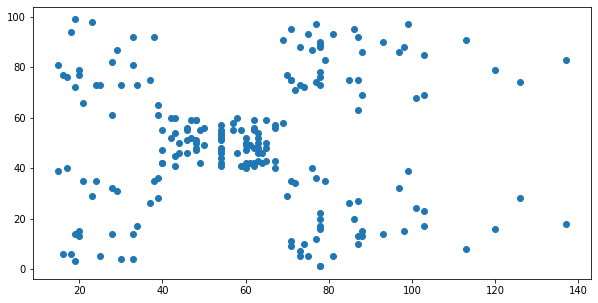

In [13]:
plt.figure(figsize=(10, 5))  
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'])
plt.show()

In [17]:
dbscan = DBSCAN(eps=10, min_samples=10, metric='euclidean')
y_dbscan = dbscan.fit_predict(data)
y_dbscan

array([-1, -1, -1,  0, -1,  0, -1, -1, -1,  0, -1, -1, -1,  0, -1,  0, -1,
        0, -1, -1, -1,  0, -1,  0, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1,
       -1, -1, -1,  0, -1, -1,  1, -1,  1,  1, -1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  2,  1,  2,  1,  2,  3,  2,  3,  2,  1,  2,  3,  2,
        3,  2,  3,  2,  3,  2,  1,  2,  3,  2,  1,  2,  3,  2,  3,  2,  3,
        2,  3,  2,  3,  2,  3,  2,  1,  2,  3,  2,  3,  2,  3,  2,  3, -1,
        3,  2,  3,  2,  3,  2,  3, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [21]:
n_cluster = unique(y_dbscan)
n_cluster # -1 is the noise points.

array([-1,  0,  1,  2,  3])

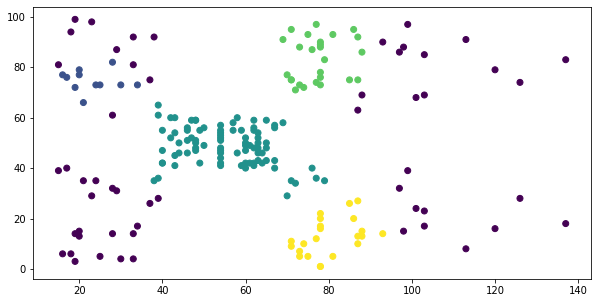

In [22]:
# ploting the clusters:

plt.figure(figsize=(10, 5))  
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c = dbscan.labels_)
plt.show()

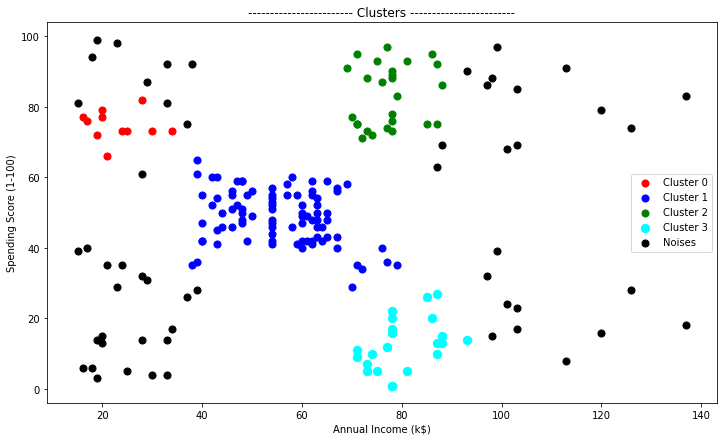

In [24]:
plt.figure(figsize=(12,7))
plt.scatter(data[y_dbscan == 0]['Annual Income (k$)'], data[y_dbscan == 0]['Spending Score (1-100)'], s=50, c='red', label='Cluster 0')
plt.scatter(data[y_dbscan == 1]['Annual Income (k$)'], data[y_dbscan == 1]['Spending Score (1-100)'], s=50, c='blue', label ='Cluster 1')
plt.scatter(data[y_dbscan == 2]['Annual Income (k$)'], data[y_dbscan == 2]['Spending Score (1-100)'], s=50, c='green', label ='Cluster 2')
plt.scatter(data[y_dbscan == 3]['Annual Income (k$)'], data[y_dbscan == 3]['Spending Score (1-100)'], s=70, c='cyan', label ='Cluster 3')
plt.scatter(data[y_dbscan == -1]['Annual Income (k$)'], data[y_dbscan == -1]['Spending Score (1-100)'], s=50, c='black', label ='Noises')


plt.title('------------------------ Clusters ------------------------')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()